In [464]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [465]:
dataset = pd.read_csv('D:/Git/ml_data.mining/data/titanic.csv')
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


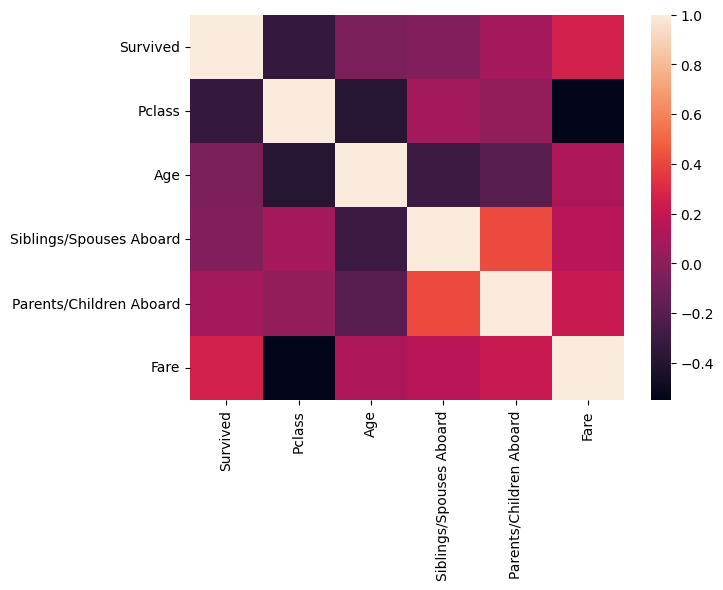

In [466]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True))
plt.show()

Балансировка

In [467]:
dataset['Pclass'].value_counts()

Pclass
3    487
1    216
2    184
Name: count, dtype: int64

In [468]:
# df_counts = dataset['Exited'].value_counts()
# for_del = df_counts.loc[0] - df_counts.loc[1]
# indexq = dataset[dataset['Exited']==0][:for_del].index
# dataset1 = dataset.drop(indexq)

In [469]:
# dataset1['Exited'].value_counts()

Нормализация

In [470]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset[['mmFare', 'mmAge']] = scaler_mm.fit_transform(dataset[['Fare', 'Age']])
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,mmFare,mmAge
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0.014151,0.271174
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0.139136,0.472229
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0.015469,0.321438
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0.103644,0.434531
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0.015713,0.434531


Удаление ненужных столбцов

In [471]:
# dataset1 = dataset1.drop(['RowNumber','CustomerId', 'Surname', 'Gender', 'EstimatedSalary', 'Age', 'CreditScore', 'Balance'], axis=1)

Удаление строк с пропущенными значениями

In [472]:
dataset = dataset.dropna()

Перевод категориальных признаков в численные

In [473]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
dataset[['Sex']] = enc.fit_transform(dataset[['Sex']])
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,mmFare,mmAge
0,0,3,Mr. Owen Harris Braund,1.0,22.0,1,0,7.2500,0.014151,0.271174
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0.0,38.0,1,0,71.2833,0.139136,0.472229
2,1,3,Miss. Laina Heikkinen,0.0,26.0,0,0,7.9250,0.015469,0.321438
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0.0,35.0,1,0,53.1000,0.103644,0.434531
4,0,3,Mr. William Henry Allen,1.0,35.0,0,0,8.0500,0.015713,0.434531


In [474]:
vals = dataset['Pclass'].unique()
vals

array([3, 1, 2])

In [475]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,mmFare,mmAge
0,0,3,Mr. Owen Harris Braund,1.0,22.0,1,0,7.2500,0.014151,0.271174
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0.0,38.0,1,0,71.2833,0.139136,0.472229
2,1,3,Miss. Laina Heikkinen,0.0,26.0,0,0,7.9250,0.015469,0.321438
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0.0,35.0,1,0,53.1000,0.103644,0.434531
4,0,3,Mr. William Henry Allen,1.0,35.0,0,0,8.0500,0.015713,0.434531


In [476]:
cols_for_clusters = ['Survived', 'Sex', 'mmAge', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'mmFare']

df= dataset[cols_for_clusters].copy()

In [477]:
df.head()

,Survived,Sex,mmAge,Siblings/Spouses Aboard,Parents/Children Aboard,mmFare
0,0,1.0,0.271174,1,0,0.014151
1,1,0.0,0.472229,1,0,0.139136
2,1,0.0,0.321438,0,0,0.015469
3,1,0.0,0.434531,1,0,0.103644
4,0,1.0,0.434531,0,0,0.015713


In [478]:
X = df
y = dataset['Pclass']

In [479]:
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans

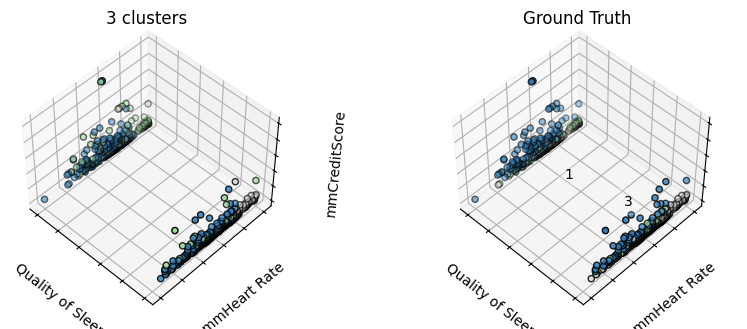

In [480]:
estimators = [
    ("k_means_exited_3", KMeans(n_clusters=3))
]

fig = plt.figure(figsize=(10, 8))
titles = ["3 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Survived"], X["mmAge"], X["mmFare"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Quality of Sleep")
    ax.set_ylabel("mmHeart Rate")
    ax.set_zlabel("mmCreditScore")
    ax.set_title(title)

ax = fig.add_subplot(2, 2, 2, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dataset[dataset["Pclass"]==name]
    ax.text3D(
        ds["Survived"].mean(),
        ds["mmAge"].mean(),
        ds["mmFare"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["Survived"], X["mmAge"], X["mmFare"], c=y, cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Quality of Sleep")
ax.set_ylabel("mmHeart Rate")
ax.set_zlabel("Sleep Duration")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [481]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21)

In [482]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.47
Adjusted Rand Index: 0.01


In [483]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n


In [484]:
best_metric

[np.int64(4),
 np.float64(0.4421759819816856),
 0.03227002645794089,
 array([[0.15217391, 0.54347826, 0.12475278, 4.36956522, 1.56521739,
         0.10172178],
        [0.1300813 , 1.        , 0.40154561, 0.17682927, 0.05691057,
         0.03983247],
        [0.82269504, 0.12411348, 0.35320539, 0.4929078 , 0.26241135,
         0.08493628],
        [0.58208955, 0.31343284, 0.31201307, 0.58208955, 2.47761194,
         0.11495288]])]

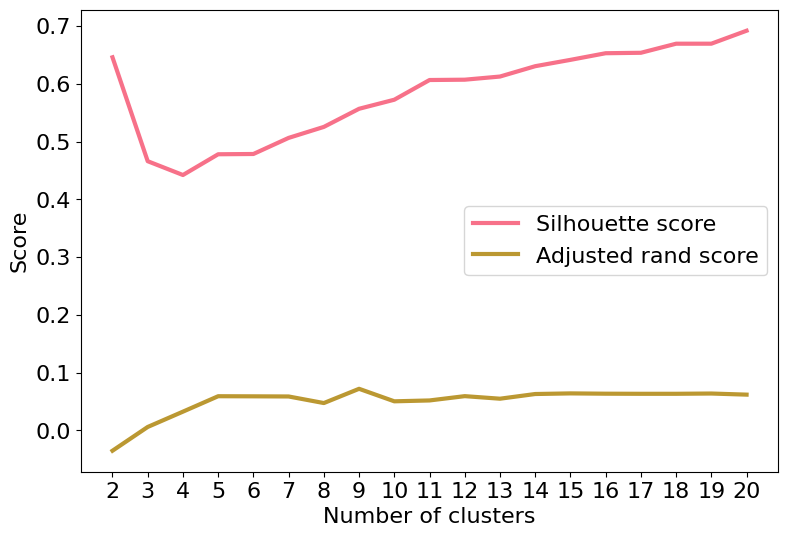

In [485]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [486]:
from scipy.cluster.hierarchy import linkage, dendrogram

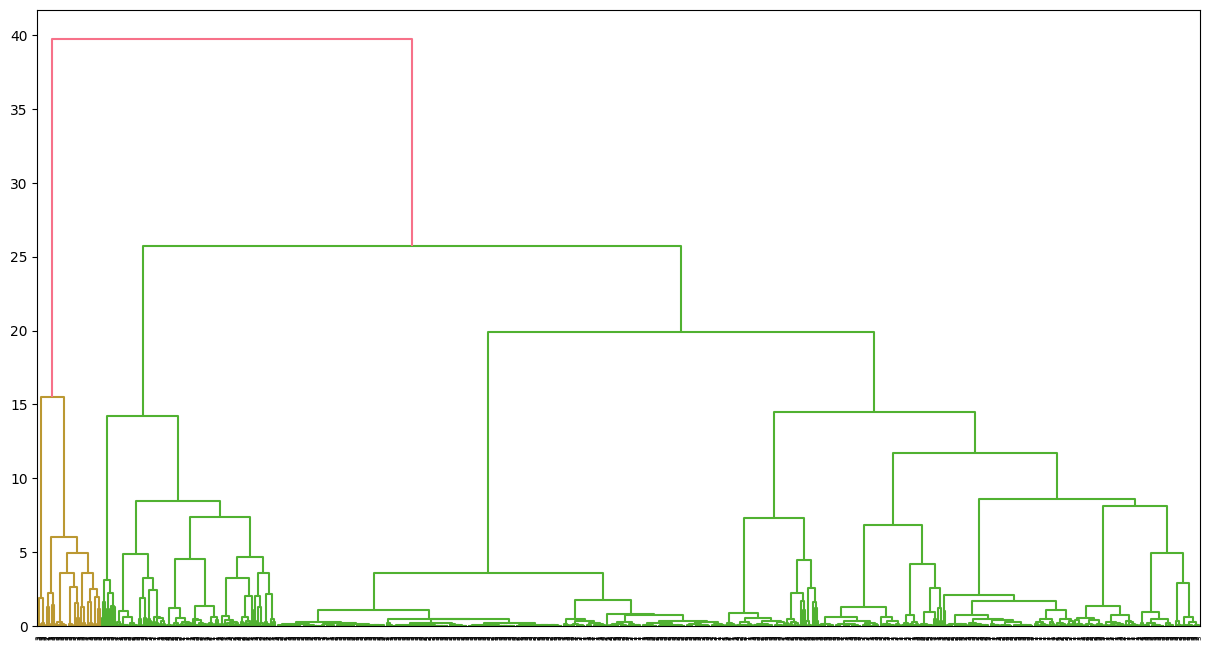

In [487]:
samples = df.values

mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

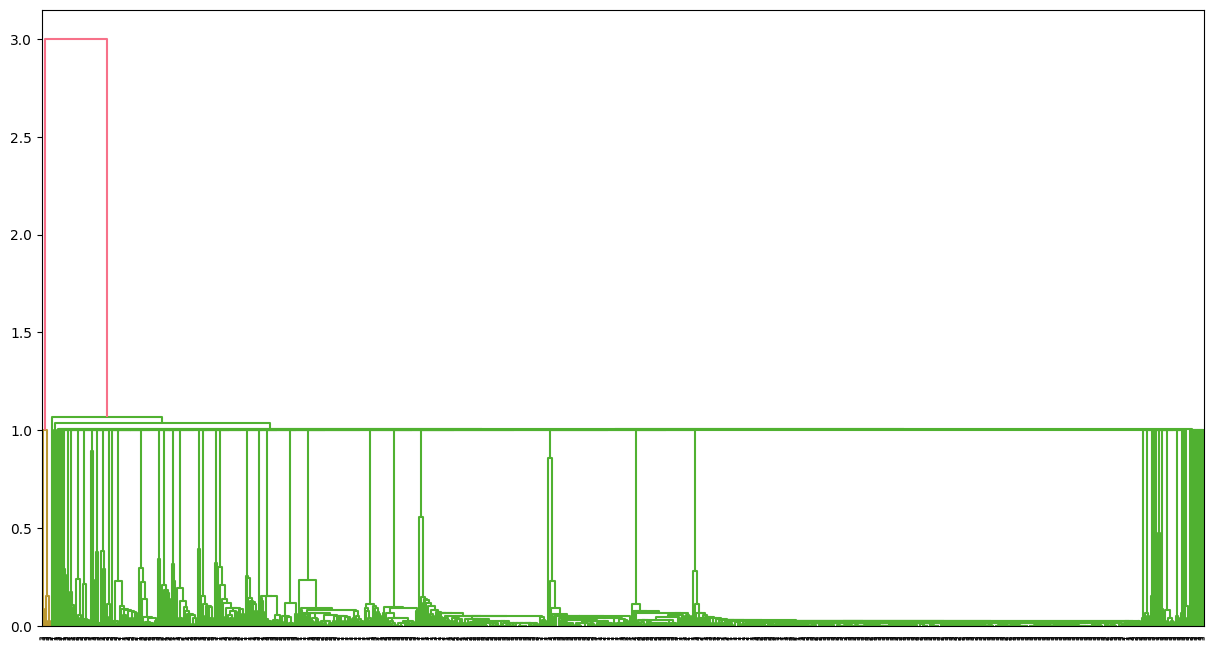

In [488]:
samples = df.values

mergings = linkage(samples, method='single')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [489]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import mutual_info_score

In [490]:
mins = X.shape[1]

['yellow', 'blue', 'green', 'red']


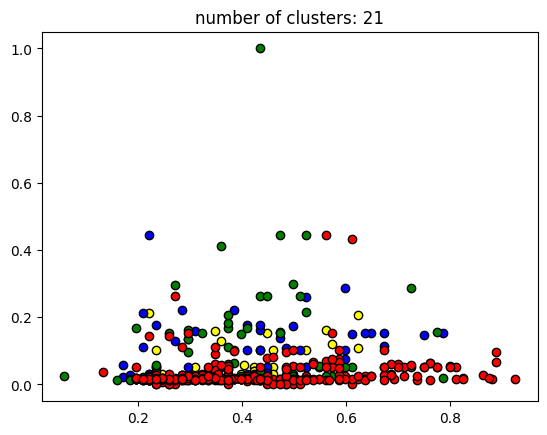

In [500]:
db = DBSCAN(eps=0.9, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors=  ['yellow', 'blue', 'green', 'red']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'black'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["mmAge"], xy["mmFare"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["mmAge"], xy["mmFare"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


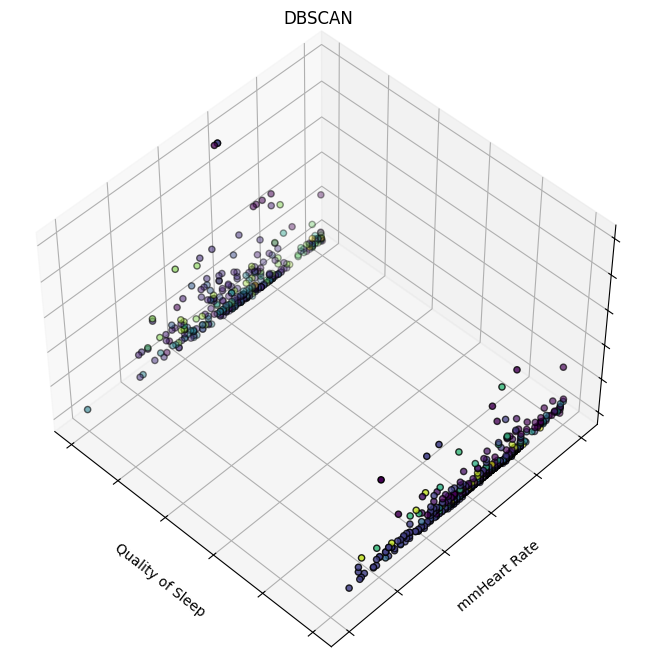

In [492]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Survived"], X["mmAge"], X["mmFare"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Quality of Sleep")
ax.set_ylabel("mmHeart Rate")
ax.set_zlabel("Sleep Duration")
ax.set_title("DBSCAN")

plt.show()

In [493]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.68
Adjusted Rand Index: 0.07
